# 20MAI0038
# Rahul Laxman Vasanad
# Digital Assignment

In [27]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
#loading the species dataset
data=pd.read_csv('mammals.csv')

In [29]:
data.head(5)

,Toothed,Hair,Breathes,Legs,Species
0,Yes,Yes,Yes,Yes,Mammal
1,Yes,Yes,Yes,Yes,Mammal
2,Yes,No,Yes,No,Reptile
3,No,Yes,Yes,Yes,Mammal
4,Yes,Yes,Yes,Yes,Mammal


In [30]:
# printing unique values of mutiple attributes
print(data['Toothed'].unique())
print('\n')
print(data['Species'].unique())

['Yes' 'No']


['Mammal' 'Reptile']


In [31]:
#Information regarding dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Toothed   15 non-null     object
 1   Hair      15 non-null     object
 2   Breathes  15 non-null     object
 3   Legs      15 non-null     object
 4   Species   15 non-null     object
dtypes: object(5)
memory usage: 728.0+ bytes


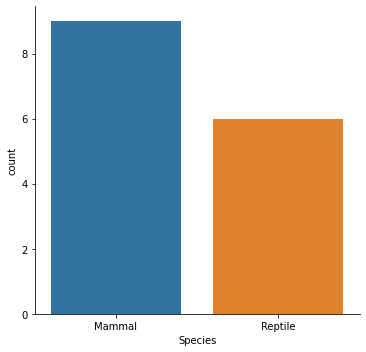

In [32]:
#Plotting graph with x axis- mammals and reptiles and on y axis- count of respective mammals and reptiles
import seaborn as sns
sns.catplot(x='Species',kind='count',data=data)

In [33]:
#Replacing Yes with 1 and No with 0 and Mammals with 0 and Repitiles with 1
data['Legs'] = data['Legs'].replace('Yes', 1)
data['Legs'] = data['Legs'].replace('No', 0)

data['Toothed'] = data['Toothed'].replace('Yes', 1)
data['Toothed'] = data['Toothed'].replace('No', 0)

data['Hair'] = data['Hair'].replace('Yes', 1)
data['Hair'] = data['Hair'].replace('No', 0)

data['Breathes'] = data['Breathes'].replace('Yes', 1)
data['Breathes'] = data['Breathes'].replace('No', 0)

data['Species'] = data['Species'].replace('Mammal', 0)
data['Species'] = data['Species'].replace('Reptile', 1)

In [34]:
data.head()

,Toothed,Hair,Breathes,Legs,Species
0,1,1,1,1,0
1,1,1,1,1,0
2,1,0,1,0,1
3,0,1,1,1,0
4,1,1,1,1,0


In [35]:
#Converting from object type to double type
data['Toothed']=data['Toothed'].astype('double')
data['Hair']=data['Hair'].astype('double')
data['Breathes']=data['Breathes'].astype('double')
data['Legs']=data['Legs'].astype('double')
data['Species']=data['Species'].astype('double')

In [36]:
# Set the Predictor(X) and Response(Y) variables
X = data.drop("Species", axis = 1)
Y = data["Species"]

In [37]:
# Spliting into Training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 25)

In [38]:
# fitting into Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
y_pred_dt=clf_entropy.fit(X_train, Y_train).predict(X_test)
print(y_pred_dt)

[0. 0. 0. 0. 0.]


In [40]:
#Confusion Matrix and Accuracy score
from sklearn.metrics import confusion_matrix,accuracy_score,average_precision_score
cnf_matrix_dt = confusion_matrix(Y_test, y_pred_dt)
print("Confusion Matrix")
print(cnf_matrix_dt)
average_precision = average_precision_score(Y_test, y_pred_dt)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

print("Accuracy Score")
accuracy_score(Y_test,y_pred_dt)*100

Confusion Matrix
[[3 0]
 [2 0]]
Average precision-recall score: 0.40
Accuracy Score


60.0

In [41]:
#fitting into Navies Bayes classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, Y_train).predict(X_test)
print(y_pred_gnb)

[1. 1. 0. 0. 0.]


In [43]:
#Confusion Matrix and Accuracy score
cmgnb=confusion_matrix(Y_test,y_pred_gnb)
print(cmgnb)
average_precision = average_precision_score(Y_test, y_pred_gnb)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
print('Accuracy score')
accuracy_score(Y_test,y_pred_gnb)*100

[[3 0]
 [0 2]]
Average precision-recall score: 1.00
Accuracy score


100.0